In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_pickle("saved_df.pkl")

In [4]:
df.shape

(707, 9)

In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# stratify: y ler esit sekilde dagitiliyor for inbalanced data.
X=df.drop(["Outcome"], axis=1)
y=df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, stratify=y, random_state=42)

### logistik_Reg

In [6]:
log_model=LogisticRegression()
log_model.fit(X_train,y_train)
y_pred=log_model.predict(X_test)
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84        94
           1       0.71      0.60      0.65        48

    accuracy                           0.78       142
   macro avg       0.76      0.74      0.75       142
weighted avg       0.78      0.78      0.78       142



### knn

In [13]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
knn_model = KNeighborsClassifier(n_neighbors = 11)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83        94
           1       0.69      0.52      0.60        48

    accuracy                           0.76       142
   macro avg       0.74      0.70      0.71       142
weighted avg       0.75      0.76      0.75       142



In [11]:
# scale; tree lerde yapilmaz, distance olanlarda (knn, pca, k-mean) mutlaka yapilir.
# Log_reg, linear regression da yapilsa iyi olur, yapilmasa da sikinti olmuyor

### decision tree

In [16]:
# with scale
dt_model = DecisionTreeClassifier().fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76        94
           1       0.52      0.50      0.51        48

    accuracy                           0.68       142
   macro avg       0.64      0.63      0.63       142
weighted avg       0.67      0.68      0.67       142



In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, stratify=y, random_state=42)

In [30]:
# without scale
dt_model = DecisionTreeClassifier().fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76        94
           1       0.52      0.48      0.50        48

    accuracy                           0.68       142
   macro avg       0.63      0.63      0.63       142
weighted avg       0.67      0.68      0.67       142



### random forest

In [42]:
rf_model = RandomForestClassifier().fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81        94
           1       0.64      0.52      0.57        48

    accuracy                           0.74       142
   macro avg       0.71      0.69      0.69       142
weighted avg       0.73      0.74      0.73       142



### RF Tunning

In [44]:
# Gridsearch:
rf = RandomForestClassifier()

In [45]:
# hyper parameters
# "n_estimators" : number of trees - takes features every time random.
# "max_depth" : the size of tree
# "max_features" : number of columns
# "min_samples_split": the number of minimum sample to divide the node
rf_params = {"n_estimators": [50, 100, 300],
             "max_depth": [3, 5, 7],
            "max_features": [2, 4, 6, 8],
             "min_samples_split": [2, 4, 6]
            }

In [46]:
rf_cv_model = GridSearchCV(rf, rf_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   34.8s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  2.1min finished


In [47]:
rf_cv_model.best_params_

{'max_depth': 5,
 'max_features': 2,
 'min_samples_split': 4,
 'n_estimators': 100}

In [77]:
rf_tuned = RandomForestClassifier(max_depth = 9,
                                  max_features = 3,
                                  min_samples_split = 4,
                                  n_estimators = 300).fit(X_train, y_train)

In [78]:
y_pred = rf_tuned.predict(X_test)
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.84        94
           1       0.70      0.58      0.64        48

    accuracy                           0.77       142
   macro avg       0.75      0.73      0.74       142
weighted avg       0.77      0.77      0.77       142



### Feature Importance

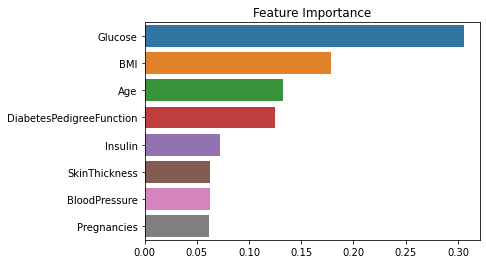

In [79]:
feature_imp = pd.Series(rf_tuned.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title("Feature Importance")
plt.show()

### XGBOOST

In [81]:
# !pip install xgboost

In [82]:
from xgboost import XGBClassifier

In [83]:
xgb_model = XGBClassifier().fit(X_train, y_train)

In [84]:
y_pred = xgb_model.predict(X_test)
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79        94
           1       0.58      0.52      0.55        48

    accuracy                           0.71       142
   macro avg       0.67      0.66      0.67       142
weighted avg       0.70      0.71      0.71       142



### xgb_tunning

In [102]:
xgb = XGBClassifier()

In [87]:
xgb_params = {"n_estimators": [50, 100, 300],
             "subsample":[0.5,0.8,1],
             "max_depth":[3,5,7],
             "learning_rate":[0.1,0.01,0.3]}

In [88]:
xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 398 out of 405 | elapsed:   23.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:   23.6s finished


In [103]:
xgb_cv_model.best_params_

{'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 300, 'subsample': 1}

In [104]:
xgb_tuned = XGBClassifier(n_estimators=300,
                         subsample=1,
                         max_depth=5,
                         learning_rate=0.3).fit(X_train, y_train)

In [105]:
y_pred = xgb_tuned.predict(X_test)
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.82      0.79        94
           1       0.57      0.48      0.52        48

    accuracy                           0.70       142
   macro avg       0.66      0.65      0.65       142
weighted avg       0.69      0.70      0.70       142



### Feature Importance

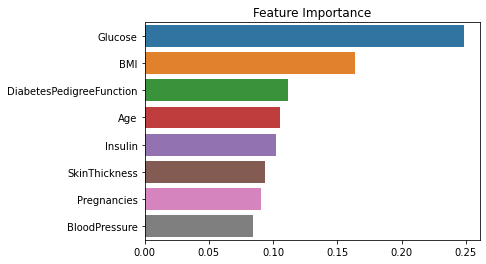

In [106]:
feature_imp = pd.Series(xgb_tuned.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title("Feature Importance")
plt.show()